# Numerične metode v tehniki
## Optimizacija - 1.del

- **avtor**: A.S. Grm
- **date**: 18/11/2023
- **primer**: 01/1

<hr>

## Metoda najmanjših kvadratov - Linearni problem

Imamo meriritve hitrosti in sile pri prostem padu telesa določene oblike

$v$ | 0 | 1.38 | 1.99 | 2.2 | 2.51 | 3.06 | 3.77 | 4.09 | 5.51 | 6.21 | 7.22 | 7.88 | 8.53 | 9.79 | 10.31 | 10.93 | 11.21 | 11.37 |
$F_d$ | 0.0 | 0.1 | 0.3 | 0.3 | 0.4 | 0.5 | 0.7 | 0.8 | 1.3 | 1.9 | 2.3 | 2.6 | 2.9 | 3.8 | 4.1 | 4.4 | 4.7 | 4.9 |

Če velja linearen zakon upora

$$ F_d = \alpha v$$

bi radi iz meritev dobili vrednost konstante $\alpha$?

Kot metodo reševanja uporabi **metodo najmanjših kvadratov**.

<hr>

Reševanje **normalnega sistema**

$$A^T A x = A^T b$$

z uporabo razcepa Choleskega

- izračunaj $B = A^T A$ in $c = A^T b$
- izračunaj razcep Choleskega $B = V V^T$
- reši spodnje trikotni sistem $V y = c$
- reši zgornje trikotni sistem $V^T x = y$
  
<hr>

In [1]:
import math as mat
import numpy as np
import matplotlib.pyplot as mpl

# MatPlotLib set fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['DejaVu Serif']

# MatPlotLib set LaTeX use
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

In [2]:
# Data

v = [0,1.38,1.99,2.2,2.51,3.06,3.77,4.09,5.51,6.21,7.22,7.88,8.53,9.79,10.31,10.93,11.21,11.37]
Fd = [0.0,0.1,0.3,0.3,0.4,0.5,0.7,0.8,1.3,1.9,2.3,2.6,2.9,3.8,4.1,4.4,4.7,4.9]

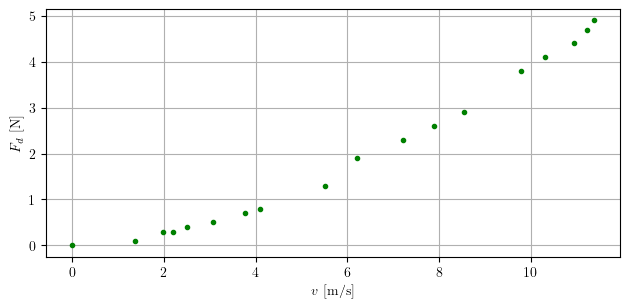

In [3]:
fig, ax = mpl.subplots()
#fig.suptitle(r'Meritev upora pri prostem padu') # Figure title

ax.plot(v,Fd, '.g')
ax.set_xlabel(r'$v$ [m/s]')
ax.set_ylabel(r'$F_d$ [N]')
ax.grid()
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('01_primer-01_1.pdf')

In [4]:
# Reši normalni sistem za linearno silo upora

def solve_ns1(ym,bm):

    yv = np.array(ym)
    bv = np.array(bm)
    nn = yv.size
    
    A = np.transpose(np.array([np.ones(nn),yv]))

    B = np.matmul(np.transpose(A),A)

    V = np.linalg.cholesky(B)
    c = np.matmul(np.transpose(A),bv)

    y = np.linalg.solve(V,c)
    x = np.linalg.solve(np.transpose(V),y)
    
    return x

In [5]:
# Reši normalni sistem za kvadratno silo upora

def solve_ns2(ym,bm):

    yv = np.array(ym)**2 
    bv = np.array(bm)
    nn = yv.size
    
    A = np.transpose(np.array([np.ones(nn),yv]))

    B = np.matmul(np.transpose(A),A)

    V = np.linalg.cholesky(B)
    c = np.matmul(np.transpose(A),bv)

    y = np.linalg.solve(V,c)
    x = np.linalg.solve(np.transpose(V),y)
    
    return x

In [6]:
# Glavni program

x1 = solve_ns1(v,Fd) # reši linearni upor
x2 = solve_ns2(v,Fd) # reši kvadratičen upor

# izračuna točke krivulje upora
vi = np.linspace(v[0],v[-1],100)
Fdi1 = x1[0] + x1[1]*vi
Fdi2 = x2[0] + x2[1]*(vi**2) 

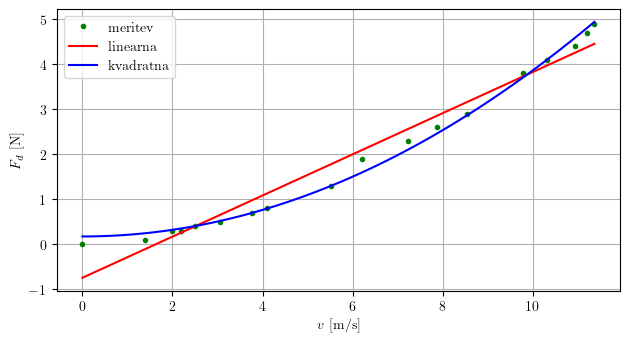

In [7]:
fig, ax = mpl.subplots()
#fig.suptitle(r'Meritev upora pri prostem padu') # Figure title

ax.plot(v,Fd, '.g', label='meritev')
ax.plot(vi,Fdi1, 'r', label='linearna')
ax.plot(vi,Fdi2, 'b', label='kvadratna')
ax.set_xlabel(r'$v$ [m/s]')
ax.set_ylabel(r'$F_d$ [N]')
ax.grid()
ax.set_aspect('equal')
ax.legend()

fig.tight_layout()
fig.savefig('01_primer-01_1.pdf')